In [3]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
url = 'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'

In [5]:
response = requests.get(url)
data = response.json()

In [6]:
episodes = data['_embedded']['episodes']

In [7]:
df = pd.DataFrame(episodes)

In [8]:
df

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>A woman named Dolores is a free spirit in t...,{'self': {'href': 'https://api.tvmaze.com/epis...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,{'average': 7.7},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard suspects that someone is sabotaging...,{'self': {'href': 'https://api.tvmaze.com/epis...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,{'average': 7.6},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard continues to investigate Dolores' s...,{'self': {'href': 'https://api.tvmaze.com/epis...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,{'average': 7.9},{'medium': 'https://static.tvmaze.com/uploads/...,<p>While Dolores joins William and Logan on th...,{'self': {'href': 'https://api.tvmaze.com/epis...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Dolores takes the first step on her path of...,{'self': {'href': 'https://api.tvmaze.com/epis...
5,932057,https://www.tvmaze.com/episodes/932057/westwor...,The Adversary,1,6,regular,2016-11-06,21:00,2016-11-07T02:00:00+00:00,60,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,"<p>While Maeve convinces Felix to show her ""up...",{'self': {'href': 'https://api.tvmaze.com/epis...
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,21:00,2016-11-14T02:00:00+00:00,60,{'average': 8.6},{'medium': 'https://static.tvmaze.com/uploads/...,<p>While William and Dolores travel to the unc...,{'self': {'href': 'https://api.tvmaze.com/epis...
7,943065,https://www.tvmaze.com/episodes/943065/westwor...,Trace Decay,1,8,regular,2016-11-20,21:00,2016-11-21T02:00:00+00:00,60,{'average': 7.9},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard tries to cope with what he did unde...,{'self': {'href': 'https://api.tvmaze.com/epis...
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,21:00,2016-11-28T02:00:00+00:00,60,{'average': 8.5},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard forces Robert to take him back into...,{'self': {'href': 'https://api.tvmaze.com/epis...
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,2016-12-05T02:00:00+00:00,90,{'average': 8.7},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Delores finds out the truth about William's...,{'self': {'href': 'https://api.tvmaze.com/epis...


In [9]:
df['airdate'] = pd.to_datetime(df['airdate'])

In [10]:
df['runtime'] = df['runtime'].astype(float)

In [13]:
df['rating'] = df['rating'].apply(lambda x: x['average']).astype(float)

In [14]:
season_ratings = df.groupby('season')['rating'].mean()

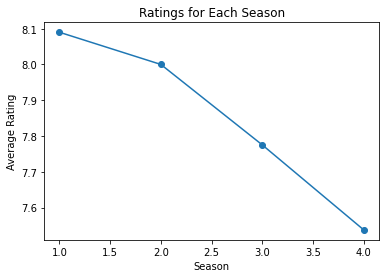

In [15]:
# Plot ratings for all seasons
plt.plot(season_ratings.index, season_ratings.values, marker='o')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Ratings for Each Season')
plt.show()

In [16]:
# Get episode names with average rating > 8 for each season
high_rating_episodes = df[df['rating'] > 8]
high_rating_episodes = high_rating_episodes.groupby('season')['name'].apply(list)

In [17]:
# Print episode names with average rating > 8 for each season
for season, episodes in high_rating_episodes.iteritems():
    print(f"Season {season}:")
    for episode in episodes:
        print(f"- {episode}")
    print()

Season 1:
- Trompe L'Oeil
- The Well-Tempered Clavier
- The Bicameral Mind

Season 2:
- Kiksuya
- Vanishing Point
- The Passenger



In [18]:
# Get episode names aired before May 2019
episodes_before_2019 = df[df['airdate'] < '2019-05-01']['name']

In [19]:
# Print episode names aired before May 2019
print("Episodes aired before May 2019:")
for episode in episodes_before_2019:
    print(f"- {episode}")
print()

Episodes aired before May 2019:
- The Original
- Chestnut
- The Stray
- Dissonance Theory
- Contrapasso
- The Adversary
- Trompe L'Oeil
- Trace Decay
- The Well-Tempered Clavier
- The Bicameral Mind
- Journey Into Night
- Reunion
- Virtù e Fortuna
- The Riddle of the Sphinx
- Akane No Mai
- Phase Space
- Les Écorchés
- Kiksuya
- Vanishing Point
- The Passenger



In [20]:
# Get episode name with the highest and lowest rating for each season
highest_rating_episodes = df.groupby('season')['name', 'rating'].apply(lambda x: x.loc[x['rating'].idxmax()])
lowest_rating_episodes = df.groupby('season')['name', 'rating'].apply(lambda x: x.loc[x['rating'].idxmin()])


<ipython-input-20-12f74f609ab6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  highest_rating_episodes = df.groupby('season')['name', 'rating'].apply(lambda x: x.loc[x['rating'].idxmax()])
<ipython-input-20-12f74f609ab6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  lowest_rating_episodes = df.groupby('season')['name', 'rating'].apply(lambda x: x.loc[x['rating'].idxmin()])


In [21]:
# Print episode name with the highest and lowest rating for each season
for season, episode in highest_rating_episodes.iterrows():
    print(f"Highest Rating Episode in Season {season}: {episode['name']}")
for season, episode in lowest_rating_episodes.iterrows():
    print(f"Lowest Rating Episode in Season {season}: {episode['name']}")
print()

Highest Rating Episode in Season 1: The Bicameral Mind
Highest Rating Episode in Season 2: Kiksuya
Highest Rating Episode in Season 3: Parce Domine
Highest Rating Episode in Season 4: Zhuangzi
Lowest Rating Episode in Season 1: The Stray
Lowest Rating Episode in Season 2: Akane No Mai
Lowest Rating Episode in Season 3: Decoherence
Lowest Rating Episode in Season 4: The Auguries



In [22]:
# Get the summary for the most popular (highest rating) episode in every season
most_popular_episodes = df.groupby('season')['rating'].idxmax()
most_popular_episodes = df.loc[most_popular_episodes]

In [23]:
# Print summary for the most popular episode in every season
for season, episode in most_popular_episodes.iterrows():
    print(f"Season {season} - Most Popular Episode: {episode['name']}")
    print(f"Summary: {episode['summary']}")
    print()

Season 9 - Most Popular Episode: The Bicameral Mind
Summary: <p>Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.</p>

Season 17 - Most Popular Episode: Kiksuya
Summary: <p>Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.</p>

Season 20 - Most Popular Episode: Parce Domine
Summary: <p>If you're stuck in a loop, try walking in a straight line.</p>

Season 32 - Most Popular Episode: Zhuangzi
Summary: <p>God is bored.</p>

